<a href="https://colab.research.google.com/github/psiudo/NumericalMethods/blob/main/forecasting_a_time_series_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np; import tensorflow as tf
from tensorflow import keras; import matplotlib.pyplot as plt

def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  # adding two sine waves of random frequencies and offsets
  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise
  return series[..., np.newaxis].astype(np.float32)

np.random.seed(42)
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:, :n_steps], series[7000:, -1]

In [4]:
model = keras.models.Sequential([
  keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
  keras.layers.SimpleRNN(20),
  keras.layers.Dense(1)
  ])
model.summary()
model.compile(loss="mse", optimizer="adam")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, None, 20)            │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
 history = model.fit(X_train, y_train, epochs=20,
 validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.1761 - val_loss: 0.0066
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0056 - val_loss: 0.0045
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 

In [8]:
n_steps = 50
pred_steps = 10
series = generate_time_series(1, n_steps + pred_steps)
X, Y = series[:, :n_steps], series[:, n_steps:]
for step_ahead in range(pred_steps):
  y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
  X = np.concatenate([X, y_pred_one], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


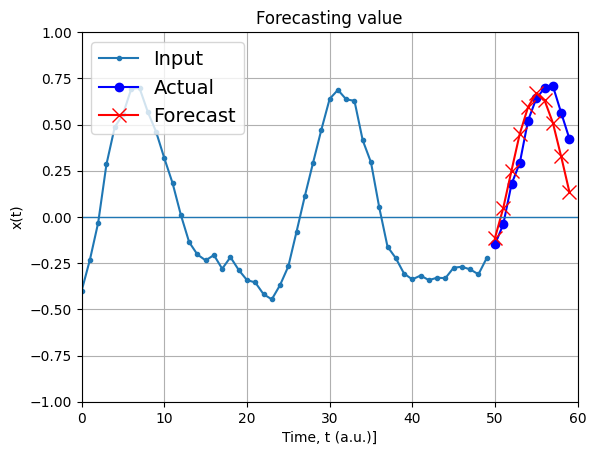

In [9]:
Y_pred = X[:, n_steps:]
plt.plot(range(n_steps), X[0, :n_steps, 0], ".-", label="Input")
plt.plot(np.arange(n_steps, n_steps + pred_steps), Y[0, :, 0], "bo-", label="Actual")
plt.plot(np.arange(n_steps, n_steps + pred_steps), \
  Y_pred[0, :, 0], "rx-", markersize=10, label="Forecast")
plt.grid(True)
plt.xlabel("Time, t (a.u.)]"); plt.ylabel("x(t)")
plt.hlines(0, 0, n_steps + pred_steps, linewidth=1)
plt.axis([0, n_steps + pred_steps, -1, 1])
plt.legend(fontsize=14, loc="upper left")
plt.title("Forecasting value")
plt.show()

In [10]:
 history = model.fit(X_train, y_train, epochs=50,
 validation_data=(X_valid, y_valid))

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 10/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 12/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 

In [20]:
n_steps = 50
pred_steps = 10
series = generate_time_series(1, n_steps + pred_steps)
X, Y = series[:, :n_steps], series[:, n_steps:]
for step_ahead in range(pred_steps):
  y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
  X = np.concatenate([X, y_pred_one], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


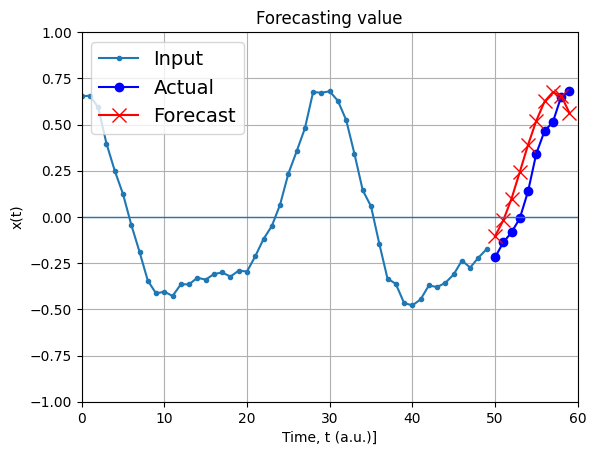

In [21]:
Y_pred = X[:, n_steps:]
plt.plot(range(n_steps), X[0, :n_steps, 0], ".-", label="Input")
plt.plot(np.arange(n_steps, n_steps + pred_steps), Y[0, :, 0], "bo-", label="Actual")
plt.plot(np.arange(n_steps, n_steps + pred_steps), \
  Y_pred[0, :, 0], "rx-", markersize=10, label="Forecast")
plt.grid(True)
plt.xlabel("Time, t (a.u.)]"); plt.ylabel("x(t)")
plt.hlines(0, 0, n_steps + pred_steps, linewidth=1)
plt.axis([0, n_steps + pred_steps, -1, 1])
plt.legend(fontsize=14, loc="upper left")
plt.title("Forecasting value")
plt.show()